## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x = np.linspace(0,20,50)
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [4]:
def Y(x_in):
    return -1*x + 2
print(Y(x))

[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


#### Plot your data points. 

<function matplotlib.pyplot.show(close=None, block=None)>

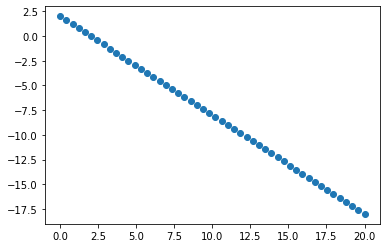

In [5]:
plt.scatter(x,Y(x))
plt.show

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

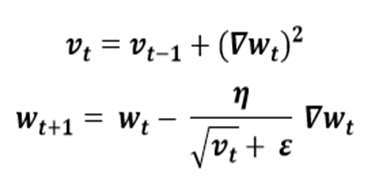

In [19]:
def Adagrad(alpha,X_in,Y_op,max_epochs,ep):
    t0 = 0
    t1 = 0
    epoch = 0
    Vt_0 = 0
    Vt_1 = 0
    cost = 0
    cost_all = []
    m = len(X_in)
    T0 = []
    T1=[]
    Y_PredA = []
    
    Y_pred = t0 + t1 * X_in
    G0 = (1/m)*sum((Y_pred - Y_op))
    G1 = (1/m)*np.dot((Y_pred - Y_op), X_in)
    norm = np.linalg.norm([G0,G1])
    
    while norm >= 0.001:
        if epoch >= max_epochs:
            break
            
        Y_pred = t0 + t1 * X_in
        Y_PredA.append(Y_pred)
        
        
        cost = (1/(2*m))*sum(((Y_pred - Y_op)**2))
        cost_all.append(cost)
        
        G0 = (1/m)*sum((Y_pred - Y_op))
        G1 = (1/m)*np.dot(Y_pred - Y_op, X_in)
        norm = np.linalg.norm([G0,G1])
        
        Vt_0 = Vt_0 + (G0**2)
        Vt_1 = Vt_1 + (G1**2)
        
        Ad_alpha0 = alpha/(np.sqrt(Vt_0) + ep)
        Ad_alpha1 = alpha/(np.sqrt(Vt_1) + ep)
        
        t0 = t0 - Ad_alpha0 * G0
        t1 = t1 - Ad_alpha1 * G1
        
        
        T0.append(t0)
        T1.append(t1)
        
        epoch += 1
        
        if epoch > 1:
            if abs(cost_all[-1] - cost_all[-2]) < 0.001:
                break
    
    return t0 , t1 , cost_all , epoch , T0 ,T1  , Y_PredA

In [20]:
A_t0 , A_t1 , A_cost , A_epoch , A_T0, A_T1 , A_YPred = Adagrad(0.1,x,Y(x),5000,1e-08)
print("theta0 = ",A_t0,"\n","theta1 = ",A_t1,"\n","no of epochs:",A_epoch)
print(len(A_YPred))

theta0 =  0.14446055736554014 
 theta1 =  -0.8586491989852966 
 no of epochs: 370
370


In [21]:
YA_pred = A_t0 + A_t1 * x
print(YA_pred)

[  0.14446056  -0.2060085   -0.55647756  -0.90694663  -1.25741569
  -1.60788475  -1.95835381  -2.30882287  -2.65929193  -3.00976099
  -3.36023005  -3.71069911  -4.06116817  -4.41163723  -4.76210629
  -5.11257535  -5.46304442  -5.81351348  -6.16398254  -6.5144516
  -6.86492066  -7.21538972  -7.56585878  -7.91632784  -8.2667969
  -8.61726596  -8.96773502  -9.31820408  -9.66867315 -10.01914221
 -10.36961127 -10.72008033 -11.07054939 -11.42101845 -11.77148751
 -12.12195657 -12.47242563 -12.82289469 -13.17336375 -13.52383281
 -13.87430188 -14.22477094 -14.57524    -14.92570906 -15.27617812
 -15.62664718 -15.97711624 -16.3275853  -16.67805436 -17.02852342]


## Calculate r2 score

In [22]:
from sklearn.metrics import r2_score
print(r2_score(Y(x),YA_pred))

0.9743880701242444


## plot all fitted lines per epoch

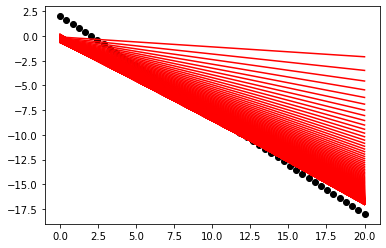

In [23]:
for i in range (len(A_T0)):
    y_PredI = A_T0[i] + A_T1[i] *  x
    plt.plot(x,y_PredI,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

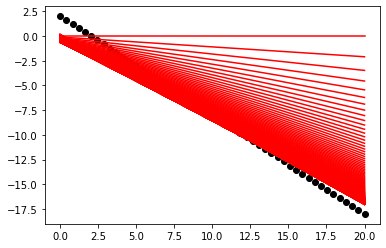

In [26]:
for i in A_YPred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

## plot best fit line 

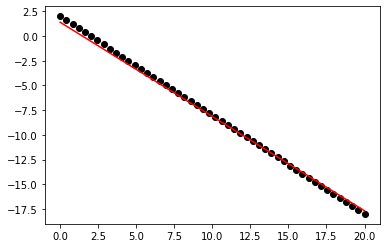

In [11]:
fig , Ad = plt.subplots()
Ad.scatter(x,Y(x),color="black")
Ad.plot(x,YA_pred,color="red")
plt.show()

## plot loss-epochs

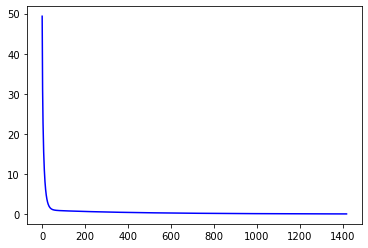

In [12]:
epochs = np.arange(0,A_epoch)
plt.plot(epochs,A_cost,'blue')
plt.show()

## plot loss-theta0

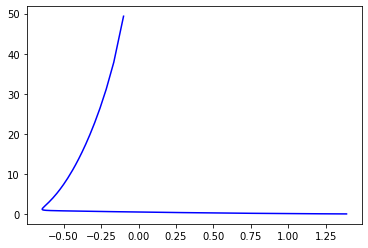

In [13]:
plt.plot(A_T0,A_cost,'blue')
plt.show()

## plot loss-theta1

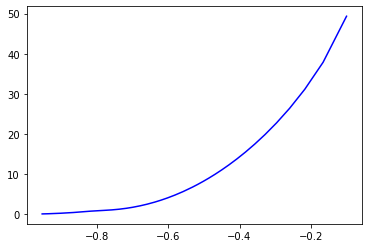

In [14]:
plt.plot(A_T1,A_cost,'blue')
plt.show()

theta0 =  -0.2182755948392776 
 theta1 =  -0.8308029952649866 
 no of epochs: 316
0.9633883271554208


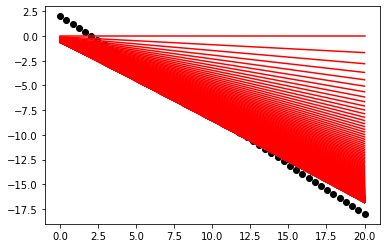

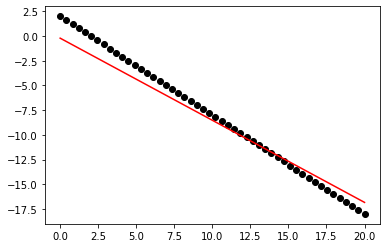

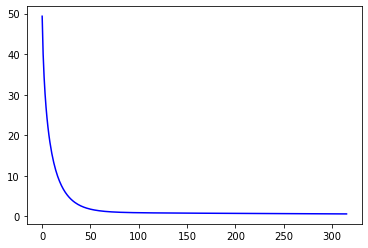

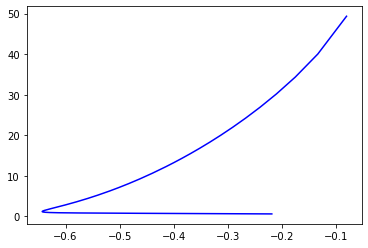

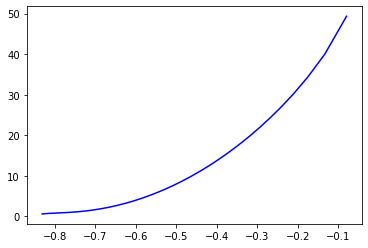

In [36]:
A1_t0 , A1_t1 , A1_cost , A1_epoch , A1_T0, A1_T1 , A1_YPred = Adagrad(0.08,x,Y(x),5000,1e-08)
print("theta0 = ",A1_t0,"\n","theta1 = ",A1_t1,"\n","no of epochs:",A1_epoch)

YA1_pred = A1_t0 + A1_t1 * x

from sklearn.metrics import r2_score
print(r2_score(Y(x),YA1_pred))

for i in A1_YPred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , Ad1 = plt.subplots()
Ad1.scatter(x,Y(x),color="black")
Ad1.plot(x,YA1_pred,color="red")
plt.show()

epochs_1 = np.arange(0,A1_epoch)
plt.plot(epochs_1,A1_cost,'blue')
plt.show()

plt.plot(A1_T0,A1_cost,'blue')
plt.show()

plt.plot(A1_T1,A1_cost,'blue')
plt.show()




theta0 =  -0.6157512023147448 
 theta1 =  -0.7788202418546757 
 no of epochs: 356
0.9463761334911589


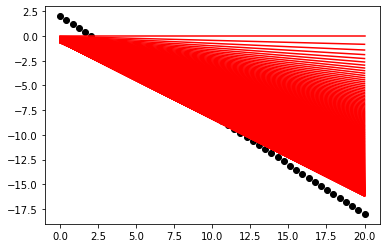

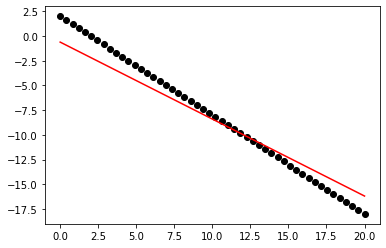

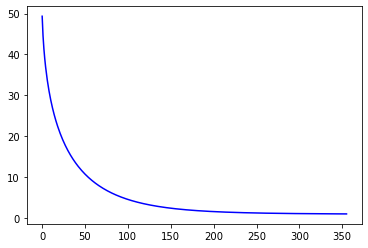

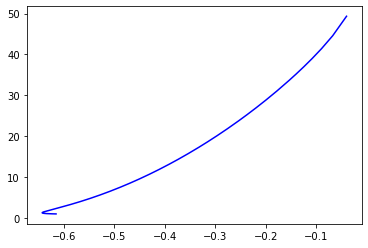

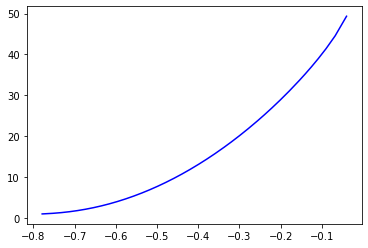

In [74]:
A2_t0 , A2_t1 , A2_cost , A2_epoch , A2_T0, A2_T1 , A2_YPred = Adagrad(0.04,x,Y(x),5000,1e-08)
print("theta0 = ",A2_t0,"\n","theta1 = ",A2_t1,"\n","no of epochs:",A2_epoch)

YA2_pred = A2_t0 + A2_t1 * x

from sklearn.metrics import r2_score
print(r2_score(Y(x),YA2_pred))

for i in A2_YPred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , Ad2 = plt.subplots()
Ad2.scatter(x,Y(x),color="black")
Ad2.plot(x,YA2_pred,color="red")
plt.show()

epochs_2 = np.arange(0,A2_epoch)
plt.plot(epochs_2,A2_cost,'blue')
plt.show()

plt.plot(A2_T0,A2_cost,'blue')
plt.show()

plt.plot(A2_T1,A2_cost,'blue')
plt.show()


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

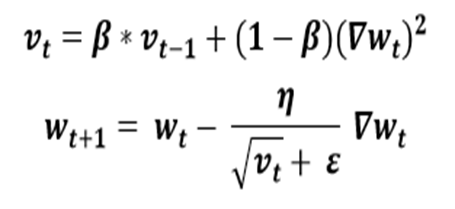

In [40]:
def RMSProb(alphaR,XR_in,YR_op,max_epochsR,epR,beta):
    t0 = 0
    t1 = 0
    epoch = 0
    Vt_0 = 0
    Vt_1 = 0
    cost = 0
    cost_all = []
    m = len(XR_in)
    T0 = []
    T1=[]
    Y_PredA = []
    
    Y_pred = t0 + t1 * XR_in
    G0 = (1/m)*sum((Y_pred - YR_op))
    G1 = (1/m)*np.dot((Y_pred - YR_op), XR_in)
    norm = np.linalg.norm([G0,G1])
    
    while norm >= 0.001:
        if epoch >= max_epochsR:
            break
            
        Y_pred = t0 + t1 * XR_in
        Y_PredA.append(Y_pred)
        
        cost = (1/(2*m))*sum(((Y_pred - YR_op)**2))
        cost_all.append(cost)
        
        G0 = (1/m)*sum((Y_pred - YR_op))
        G1 = (1/m)*np.dot(Y_pred - YR_op, XR_in)
        norm = np.linalg.norm([G0,G1])
        
        Vt_0 = (beta * Vt_0) + ((1-beta)*(G0**2))
        Vt_1 = (beta * Vt_1) + ((1-beta)*(G1**2))
        
        Ad_alpha0 = alphaR/(np.sqrt(Vt_0) + epR)
        Ad_alpha1 = alphaR/(np.sqrt(Vt_1) + epR)
        
        t0 = t0 - Ad_alpha0 * G0
        t1 = t1 - Ad_alpha1 * G1
        
        
        T0.append(t0)
        T1.append(t1)
        
        epoch += 1
        
        if epoch > 1:
            if abs(cost_all[-1] - cost_all[-2]) < 0.0001:
                break
    
    return t0 , t1 , cost_all , epoch , T0 ,T1 , Y_PredA

In [42]:
R_t0 , R_t1 , R_cost , R_epoch , R_T0, R_T1, YR_PredA = RMSProb(0.1,x,Y(x),5000,1e-08,0.5)
print("theta0 = ",R_t0,"\n","theta1 = ",R_t1,"\n","no of epochs:",R_epoch)
print(len(R_cost))

theta0 =  1.840429086028649 
 theta1 =  -1.0416637877592694 
 no of epochs: 115
115


In [43]:
YR_pred = R_t0 + R_t1 * x
print(YR_pred)

[  1.84042909   1.41526019   0.9900913    0.56492241   0.13975351
  -0.28541538  -0.71058427  -1.13575316  -1.56092206  -1.98609095
  -2.41125984  -2.83642874  -3.26159763  -3.68676652  -4.11193542
  -4.53710431  -4.9622732   -5.38744209  -5.81261099  -6.23777988
  -6.66294877  -7.08811767  -7.51328656  -7.93845545  -8.36362435
  -8.78879324  -9.21396213  -9.63913102 -10.06429992 -10.48946881
 -10.9146377  -11.3398066  -11.76497549 -12.19014438 -12.61531327
 -13.04048217 -13.46565106 -13.89081995 -14.31598885 -14.74115774
 -15.16632663 -15.59149553 -16.01666442 -16.44183331 -16.8670022
 -17.2921711  -17.71733999 -18.14250888 -18.56767778 -18.99284667]


## Calculate r2 score

In [44]:
from sklearn.metrics import r2_score
print(r2_score(Y(x),YR_pred))

0.9886942393764275


## plot all fitted lines per epoch

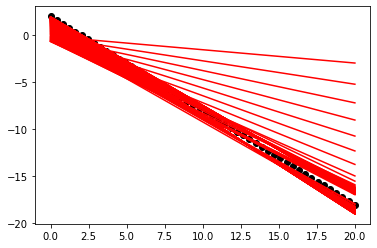

In [45]:
for i in range (len(R_T0)):
    YR_predI = R_T0[i] + R_T1[i] *  x
    plt.plot(x,YR_predI,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

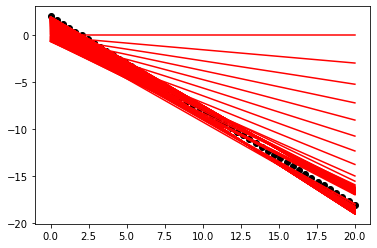

In [46]:
for i in YR_PredA:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

## plot best fit line

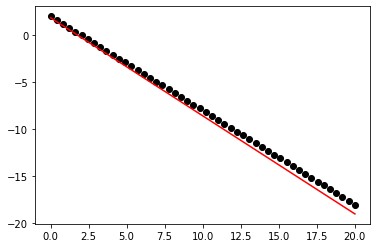

In [47]:
fig , RP = plt.subplots()
RP.scatter(x,Y(x),color="black")
RP.plot(x,YR_pred,color="red")
plt.show()

## loss Vs epochs

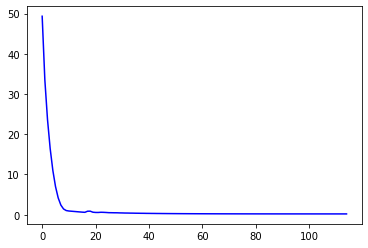

In [48]:
epochs_R = np.arange(0,R_epoch)
plt.plot(epochs_R,R_cost,'blue')
plt.show()

## loss Vs theta0

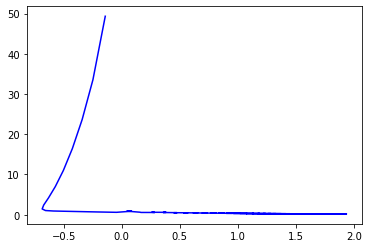

In [49]:
plt.plot(R_T0,R_cost,'blue')
plt.show()

## loss Vs theta1

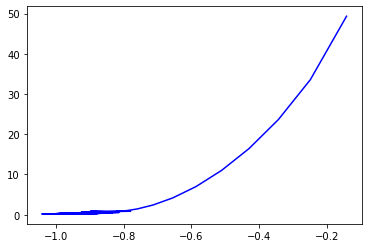

In [50]:
plt.plot(R_T1,R_cost,'blue')
plt.show()

theta0 =  1.8505864180561389 
 theta1 =  -1.0316741704590804 
 no of epochs: 119
0.9927333723333488


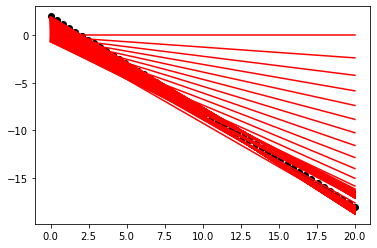

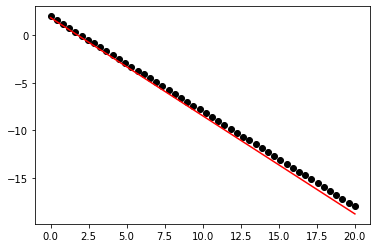

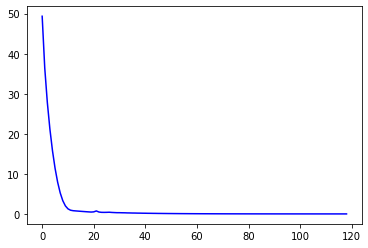

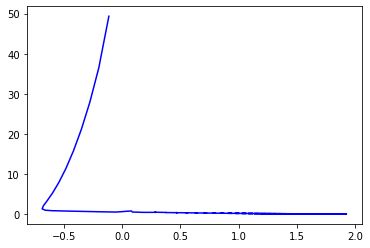

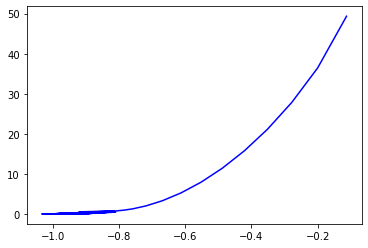

In [69]:
R1_t0 , R1_t1 , R1_cost , R1_epoch , R1_T0, R1_T1, YR1_PredA = RMSProb(0.08,x,Y(x),5000,1e-08,0.5)
print("theta0 = ",R1_t0,"\n","theta1 = ",R1_t1,"\n","no of epochs:",R1_epoch)

YR1_pred = R1_t0 + R1_t1 * x
#print(YR1_pred)

from sklearn.metrics import r2_score
print(r2_score(Y(x),YR1_pred))

for i in YR1_PredA:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , RP1 = plt.subplots()
RP1.scatter(x,Y(x),color="black")
RP1.plot(x,YR1_pred,color="red")
plt.show()

epochs_R1 = np.arange(0,R1_epoch)
plt.plot(epochs_R1,R1_cost,'blue')
plt.show()

plt.plot(R1_T0,R1_cost,'blue')
plt.show()

plt.plot(R1_T1,R1_cost,'blue')
plt.show()



theta0 =  1.863917930155488 
 theta1 =  -1.0111571863706046 
 no of epochs: 143
0.9981076989162033


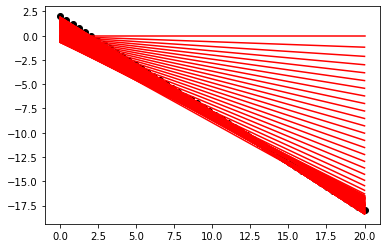

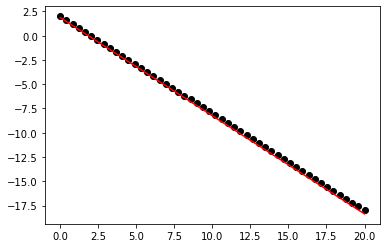

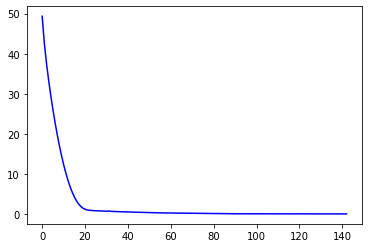

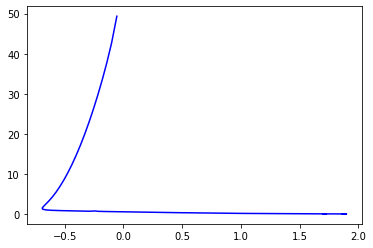

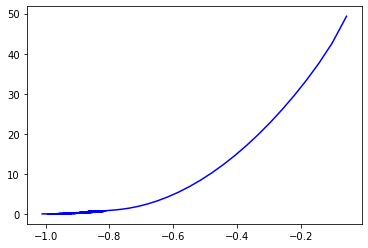

In [75]:
R2_t0 , R2_t1 , R2_cost , R2_epoch , R2_T0, R2_T1, YR2_PredA = RMSProb(0.04,x,Y(x),5000,1e-08,0.5)
print("theta0 = ",R2_t0,"\n","theta1 = ",R2_t1,"\n","no of epochs:",R2_epoch)

YR2_pred = R2_t0 + R2_t1 * x
#print(YR1_pred)

from sklearn.metrics import r2_score
print(r2_score(Y(x),YR2_pred))

for i in YR2_PredA:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , RP2 = plt.subplots()
RP2.scatter(x,Y(x),color="black")
RP2.plot(x,YR2_pred,color="red")
plt.show()

epochs_R2 = np.arange(0,R2_epoch)
plt.plot(epochs_R2,R2_cost,'blue')
plt.show()

plt.plot(R2_T0,R2_cost,'blue')
plt.show()

plt.plot(R2_T1,R2_cost,'blue')
plt.show()


## Comparisn Between Adgrad & RMSProb

In [88]:
print("for alpha = 0.1:")
print("Adgrad: ","theta0 = ",A_t0," ","theta1 = ",A_t1," ","no of epochs:",A_epoch )
print("RMSProb: " ,"theta0 = ",R_t0," ","theta1 = ",R_t1," ","no of epochs:",R_epoch )

print("for alpha = 0.08:")
print("Adgrad: ","theta0 = ",A1_t0," ","theta1 = ",A1_t1," ","no of epochs:",A1_epoch )
print("RMSProb: " ,"theta0 = ",R1_t0," ","theta1 = ",R1_t1," ","no of epochs:",R1_epoch )

print("for alpha = 0.04:")
print("Adgrad: ","theta0 = ",A2_t0," ","theta1 = ",A2_t1," ","no of epochs:",A2_epoch )
print("RMSProb: " ,"theta0 = ",R2_t0," ","theta1 = ",R2_t1," ","no of epochs:",R2_epoch )



for alpha = 0.1:
Adgrad:  theta0 =  0.14446055736554014   theta1 =  -0.8586491989852966   no of epochs: 370
RMSProb:  theta0 =  1.840429086028649   theta1 =  -1.0416637877592694   no of epochs: 115
for alpha = 0.08:
Adgrad:  theta0 =  -0.2182755948392776   theta1 =  -0.8308029952649866   no of epochs: 316
RMSProb:  theta0 =  1.8505864180561389   theta1 =  -1.0316741704590804   no of epochs: 119
for alpha = 0.04:
Adgrad:  theta0 =  -0.6157512023147448   theta1 =  -0.7788202418546757   no of epochs: 356
RMSProb:  theta0 =  1.863917930155488   theta1 =  -1.0111571863706046   no of epochs: 143


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

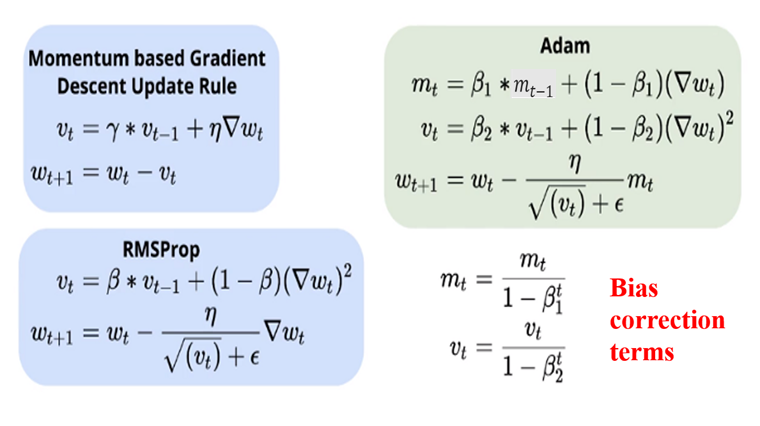

In [52]:
def AdamB(alphaAB,XAB_in,YAB_op,max_epochsAB,epAB,beta1B,beta2B):
    t0 = 0
    t1 = 0
    epoch = 0
    Mt_0 = 0
    Mt_1 = 0
    Vt_0 = 0
    Vt_1 = 0
    cost = 0
    cost_all = []
    m = len(XAB_in)
    T0 = []
    T1=[]
    Y_PredA = []
    
    
    Y_pred = t0 + t1 * XAB_in
    G0 = (1/m)*sum((Y_pred - YAB_op))
    G1 = (1/m)*np.dot((Y_pred - YAB_op), XAB_in)
    norm = np.linalg.norm([G0,G1])
    
    while norm >= 0.001:
        if epoch >= max_epochsAB:
            break
            
        Y_pred = t0 + t1 * XAB_in
        Y_PredA.append(Y_pred)
        
        cost = (1/(2*m))*sum(((Y_pred - YAB_op)**2))
        cost_all.append(cost)
        
        G0 = (1/m)*sum((Y_pred - YAB_op))
        G1 = (1/m)*np.dot(Y_pred - YAB_op, XAB_in)
        norm = np.linalg.norm([G0,G1])
        
        Mt_0 = (beta1B * Mt_0) + ((1-beta1B)*G0)
        Mt_1 = (beta1B * Mt_1) + ((1-beta1B)*G1)
        
        Vt_0 = (beta2B * Vt_0) + ((1-beta2B)*(G0**2))
        Vt_1 = (beta2B * Vt_1) + ((1-beta2B)*(G1**2))
        
        Mt_0h = Mt_0 /(1-((beta1B)**(epoch+1)))
        Mt_1h = Mt_1 /(1-((beta1B)**(epoch+1)))
        
        Vt_0h = Vt_0 /(1-((beta2B)**(epoch+1)))
        Vt_1h = Vt_1 /(1-((beta2B)**(epoch+1)))
                       
            
        Ad_alpha0 = alphaAB/(np.sqrt(Vt_0h) + epAB)
        Ad_alpha1 = alphaAB/(np.sqrt(Vt_1h) + epAB)
        
        t0 = t0 - Ad_alpha0 * Mt_0h
        t1 = t1 - Ad_alpha1 * Mt_1h
        
        
        T0.append(t0)
        T1.append(t1)
        
        epoch += 1
        
        if epoch > 1:
            if abs(cost_all[-1] - cost_all[-2]) < 0.0001:
                break
    
    return t0 , t1 , cost_all , epoch , T0 ,T1 ,Y_PredA

In [53]:
ADB_t0 , ADB_t1 , ADB_cost , ADB_epoch , ADB_T0, ADB_T1 ,ADB_Ypred = AdamB(0.1,x,Y(x),5000,1e-08,0.5,0.6)
print("theta0 = ",ADB_t0,"\n","theta1 = ",ADB_t1,"\n","no of epochs:",ADB_epoch)
print(len(ADB_cost))

theta0 =  2.001488716321316 
 theta1 =  -0.9985111925926478 
 no of epochs: 127
127


In [56]:
YADB_pred = ADB_t0 + ADB_t1 * x
print(YADB_pred)

[  2.00148872   1.59393313   1.18637754   0.77882195   0.37126636
  -0.03628923  -0.44384482  -0.85140041  -1.25895599  -1.66651158
  -2.07406717  -2.48162276  -2.88917835  -3.29673394  -3.70428953
  -4.11184512  -4.5194007   -4.92695629  -5.33451188  -5.74206747
  -6.14962306  -6.55717865  -6.96473424  -7.37228983  -7.77984542
  -8.187401    -8.59495659  -9.00251218  -9.41006777  -9.81762336
 -10.22517895 -10.63273454 -11.04029013 -11.44784571 -11.8554013
 -12.26295689 -12.67051248 -13.07806807 -13.48562366 -13.89317925
 -14.30073484 -14.70829043 -15.11584601 -15.5234016  -15.93095719
 -16.33851278 -16.74606837 -17.15362396 -17.56117955 -17.96873514]


## Calculate r2 score

In [59]:
from sklearn.metrics import r2_score
print(r2_score(Y(x),YADB_pred))

0.9999900530031401


## plot all fitted lines per epoch

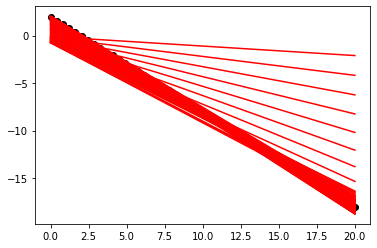

In [60]:
for i in range (len(ADB_T0)):
    YADB_predI = ADB_T0[i] + ADB_T1[i] *  x
    plt.plot(x,YADB_predI,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

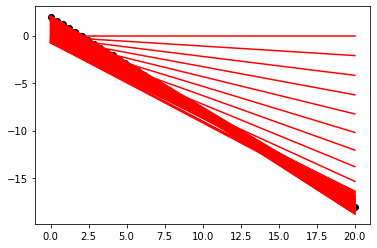

In [61]:
for i in ADB_Ypred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

## plot best fit line

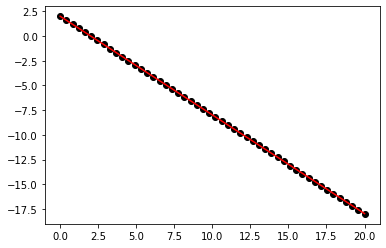

In [62]:
fig , ADB = plt.subplots()
ADB.scatter(x,Y(x),color="black")
ADB.plot(x,YADB_pred,color="red")
plt.show()

## Loss Vs Epochs

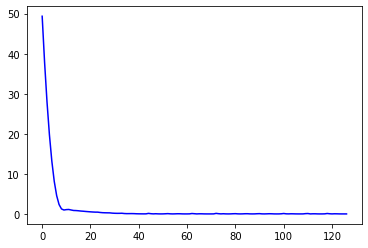

In [63]:
epochs_ADB = np.arange(0,ADB_epoch)
plt.plot(epochs_ADB,ADB_cost,'blue')
plt.show()

## loss Vs theta0

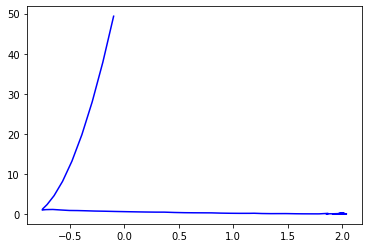

In [64]:
plt.plot(ADB_T0,ADB_cost,'blue')
plt.show()

## loss Vs theta1

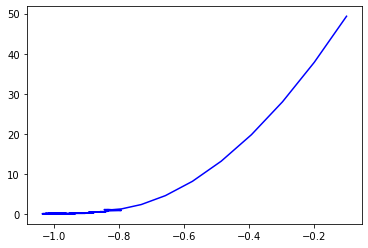

In [65]:
plt.plot(ADB_T1,ADB_cost,'blue')
plt.show()

theta0 =  2.0069890806513593 
 theta1 =  -0.9908832358785833 
 no of epochs: 80
0.9996391773411768


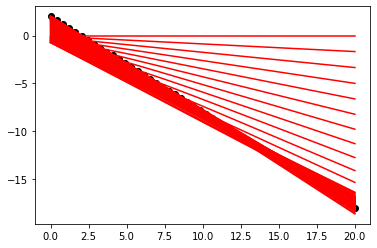

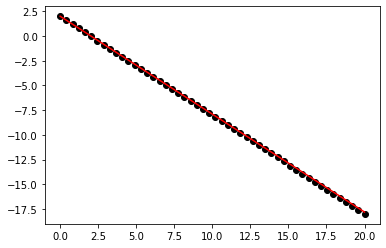

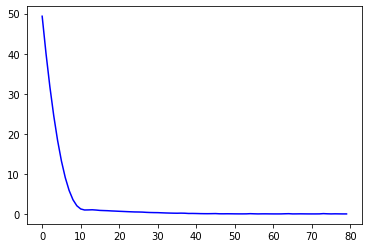

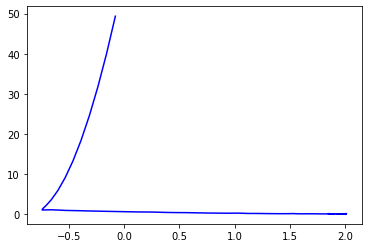

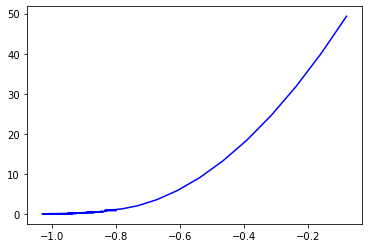

In [81]:
ADB1_t0 , ADB1_t1 , ADB1_cost , ADB1_epoch , ADB1_T0, ADB1_T1 ,ADB1_Ypred = AdamB(0.08,x,Y(x),5000,1e-08,0.5,0.6)
print("theta0 = ",ADB1_t0,"\n","theta1 = ",ADB1_t1,"\n","no of epochs:",ADB1_epoch)

YADB1_pred = ADB1_t0 + ADB1_t1 * x

from sklearn.metrics import r2_score
print(r2_score(Y(x),YADB1_pred))

for i in ADB1_Ypred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , ADB1 = plt.subplots()
ADB1.scatter(x,Y(x),color="black")
ADB1.plot(x,YADB1_pred,color="red")
plt.show()

epochs_ADB1 = np.arange(0,ADB1_epoch)
plt.plot(epochs_ADB1,ADB1_cost,'blue')
plt.show()

plt.plot(ADB1_T0,ADB1_cost,'blue')
plt.show()

plt.plot(ADB1_T1,ADB1_cost,'blue')
plt.show()

theta0 =  1.993907673235406 
 theta1 =  -1.005714532418416 
 no of epochs: 124
0.9998520788107811


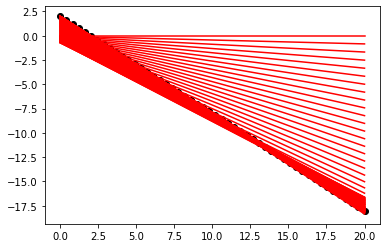

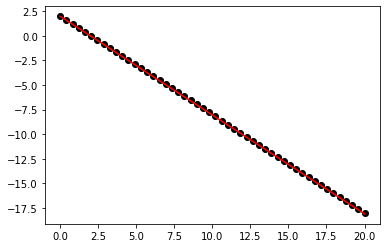

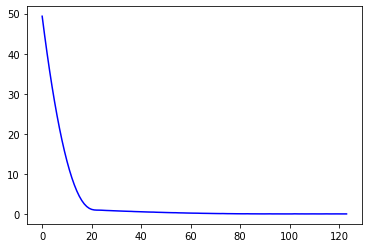

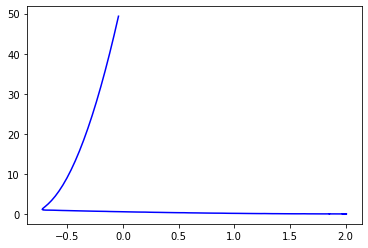

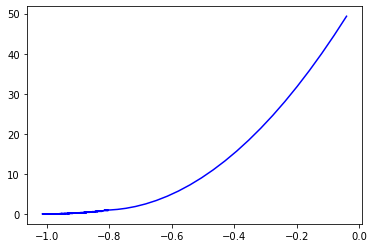

In [83]:
ADB2_t0 , ADB2_t1 , ADB2_cost , ADB2_epoch , ADB2_T0, ADB2_T1 ,ADB2_Ypred = AdamB(0.04,x,Y(x),5000,1e-08,0.5,0.6)
print("theta0 = ",ADB2_t0,"\n","theta1 = ",ADB2_t1,"\n","no of epochs:",ADB2_epoch)

YADB2_pred = ADB2_t0 + ADB2_t1 * x

from sklearn.metrics import r2_score
print(r2_score(Y(x),YADB2_pred))

for i in ADB2_Ypred:
    plt.plot(x,i,"red")
    
plt.scatter(x,Y(x),color="black")
plt.show()

fig , ADB2 = plt.subplots()
ADB2.scatter(x,Y(x),color="black")
ADB2.plot(x,YADB2_pred,color="red")
plt.show()

epochs_ADB2 = np.arange(0,ADB2_epoch)
plt.plot(epochs_ADB2,ADB2_cost,'blue')
plt.show()

plt.plot(ADB2_T0,ADB2_cost,'blue')
plt.show()

plt.plot(ADB2_T1,ADB2_cost,'blue')
plt.show()

## Comparisn Between Adgrad & RMSProb & Adam

In [89]:
print("for alpha = 0.1:")
print("Adgrad: ","theta0 = ",A_t0," ","theta1 = ",A_t1," ","no of epochs:",A_epoch )
print("RMSProb: " ,"theta0 = ",R_t0," ","theta1 = ",R_t1," ","no of epochs:",R_epoch )
print("Adam:", "theta0 = ",ADB_t0," ","theta1 = ",ADB_t1," ","no of epochs:",ADB_epoch)

print("for alpha = 0.08:")
print("Adgrad: ","theta0 = ",A1_t0," ","theta1 = ",A1_t1," ","no of epochs:",A1_epoch )
print("RMSProb: " ,"theta0 = ",R1_t0," ","theta1 = ",R1_t1," ","no of epochs:",R1_epoch )
print("Adam:", "theta0 = ",ADB1_t0," ","theta1 = ",ADB1_t1," ","no of epochs:",ADB1_epoch)

print("for alpha = 0.04:")
print("Adgrad: ","theta0 = ",A2_t0," ","theta1 = ",A2_t1," ","no of epochs:",A2_epoch )
print("RMSProb: " ,"theta0 = ",R2_t0," ","theta1 = ",R2_t1," ","no of epochs:",R2_epoch )
print("Adam:", "theta0 = ",ADB2_t0," ","theta1 = ",ADB2_t1," ","no of epochs:",ADB2_epoch)


for alpha = 0.1:
Adgrad:  theta0 =  0.14446055736554014   theta1 =  -0.8586491989852966   no of epochs: 370
RMSProb:  theta0 =  1.840429086028649   theta1 =  -1.0416637877592694   no of epochs: 115
Adam: theta0 =  2.001488716321316   theta1 =  -0.9985111925926478   no of epochs: 127
for alpha = 0.08:
Adgrad:  theta0 =  -0.2182755948392776   theta1 =  -0.8308029952649866   no of epochs: 316
RMSProb:  theta0 =  1.8505864180561389   theta1 =  -1.0316741704590804   no of epochs: 119
Adam: theta0 =  2.0069890806513593   theta1 =  -0.9908832358785833   no of epochs: 80
for alpha = 0.04:
Adgrad:  theta0 =  -0.6157512023147448   theta1 =  -0.7788202418546757   no of epochs: 356
RMSProb:  theta0 =  1.863917930155488   theta1 =  -1.0111571863706046   no of epochs: 143
Adam: theta0 =  1.993907673235406   theta1 =  -1.005714532418416   no of epochs: 124


## Congratulations 
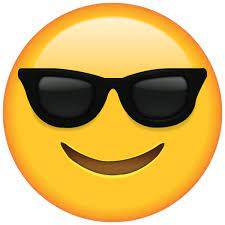